In [1]:
from sklearn.datasets import load_breast_cancer

In [2]:
data = load_breast_cancer()

In [3]:
type(data)

sklearn.utils.Bunch

In [4]:
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [5]:
data.data.shape

(569, 30)

In [6]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [7]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [8]:
data.target.shape

(569,)

In [9]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X = data.data

In [12]:
y = data.target

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
scaler = StandardScaler()

In [16]:
X_train = scaler.fit_transform(X_train)

In [17]:
X_test = scaler.transform(X_test)

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.callbacks import EarlyStopping

In [19]:
early_stop = EarlyStopping(monitor='val_loss', patience=20)

In [20]:
X_train.shape

(381, 30)

In [21]:
model = Sequential()

In [22]:
model.add(Input(shape=30))
model.add(Dense(units=1, activation='sigmoid') )

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics=['accuracy'])

In [23]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs = 500, callbacks=[early_stop])

Train on 381 samples, validate on 188 samples
Epoch 1/500
381/381 [==============================] - 1s 2ms/sample - loss: 0.4381 - accuracy: 0.8320 - val_loss: 0.4015 - val_accuracy: 0.8723
Epoch 2/500
381/381 [==============================] - 0s 97us/sample - loss: 0.3981 - accuracy: 0.8583 - val_loss: 0.3679 - val_accuracy: 0.8936
Epoch 3/500
381/381 [==============================] - 0s 94us/sample - loss: 0.3648 - accuracy: 0.8845 - val_loss: 0.3395 - val_accuracy: 0.9043
Epoch 4/500
381/381 [==============================] - 0s 94us/sample - loss: 0.3362 - accuracy: 0.9003 - val_loss: 0.3162 - val_accuracy: 0.9202
Epoch 5/500
381/381 [==============================] - 0s 97us/sample - loss: 0.3129 - accuracy: 0.9160 - val_loss: 0.2963 - val_accuracy: 0.9309
Epoch 6/500
381/381 [==============================] - 0s 115us/sample - loss: 0.2935 - accuracy: 0.9213 - val_loss: 0.2792 - val_accuracy: 0.9362
Epoch 7/500
381/381 [==============================] - 0s 94us/sample - loss: 

381/381 [==============================] - 0s 97us/sample - loss: 0.1053 - accuracy: 0.9790 - val_loss: 0.0983 - val_accuracy: 0.9787
Epoch 57/500
381/381 [==============================] - 0s 94us/sample - loss: 0.1045 - accuracy: 0.9816 - val_loss: 0.0975 - val_accuracy: 0.9787
Epoch 58/500
381/381 [==============================] - 0s 97us/sample - loss: 0.1037 - accuracy: 0.9816 - val_loss: 0.0966 - val_accuracy: 0.9787
Epoch 59/500
381/381 [==============================] - 0s 94us/sample - loss: 0.1031 - accuracy: 0.9816 - val_loss: 0.0957 - val_accuracy: 0.9787
Epoch 60/500
381/381 [==============================] - 0s 97us/sample - loss: 0.1024 - accuracy: 0.9816 - val_loss: 0.0950 - val_accuracy: 0.9787
Epoch 61/500
381/381 [==============================] - 0s 105us/sample - loss: 0.1018 - accuracy: 0.9816 - val_loss: 0.0941 - val_accuracy: 0.9787
Epoch 62/500
381/381 [==============================] - 0s 92us/sample - loss: 0.1011 - accuracy: 0.9816 - val_loss: 0.0933 - val_

381/381 [==============================] - 0s 97us/sample - loss: 0.0819 - accuracy: 0.9816 - val_loss: 0.0710 - val_accuracy: 0.9840
Epoch 112/500
381/381 [==============================] - 0s 94us/sample - loss: 0.0817 - accuracy: 0.9816 - val_loss: 0.0707 - val_accuracy: 0.9840
Epoch 113/500
381/381 [==============================] - 0s 94us/sample - loss: 0.0814 - accuracy: 0.9816 - val_loss: 0.0705 - val_accuracy: 0.9840
Epoch 114/500
381/381 [==============================] - 0s 94us/sample - loss: 0.0812 - accuracy: 0.9816 - val_loss: 0.0702 - val_accuracy: 0.9840
Epoch 115/500
381/381 [==============================] - 0s 94us/sample - loss: 0.0809 - accuracy: 0.9816 - val_loss: 0.0700 - val_accuracy: 0.9840
Epoch 116/500
381/381 [==============================] - 0s 105us/sample - loss: 0.0807 - accuracy: 0.9816 - val_loss: 0.0697 - val_accuracy: 0.9840
Epoch 117/500
381/381 [==============================] - 0s 97us/sample - loss: 0.0805 - accuracy: 0.9816 - val_loss: 0.0694 

381/381 [==============================] - 0s 97us/sample - loss: 0.0722 - accuracy: 0.9869 - val_loss: 0.0612 - val_accuracy: 0.9840
Epoch 167/500
381/381 [==============================] - 0s 94us/sample - loss: 0.0721 - accuracy: 0.9869 - val_loss: 0.0610 - val_accuracy: 0.9840
Epoch 168/500
381/381 [==============================] - 0s 94us/sample - loss: 0.0720 - accuracy: 0.9869 - val_loss: 0.0609 - val_accuracy: 0.9840
Epoch 169/500
381/381 [==============================] - 0s 97us/sample - loss: 0.0719 - accuracy: 0.9869 - val_loss: 0.0608 - val_accuracy: 0.9840
Epoch 170/500
381/381 [==============================] - 0s 92us/sample - loss: 0.0718 - accuracy: 0.9869 - val_loss: 0.0607 - val_accuracy: 0.9840
Epoch 171/500
381/381 [==============================] - 0s 94us/sample - loss: 0.0716 - accuracy: 0.9869 - val_loss: 0.0607 - val_accuracy: 0.9840
Epoch 172/500
381/381 [==============================] - 0s 107us/sample - loss: 0.0715 - accuracy: 0.9869 - val_loss: 0.0606 

381/381 [==============================] - 0s 97us/sample - loss: 0.0667 - accuracy: 0.9843 - val_loss: 0.0565 - val_accuracy: 0.9840
Epoch 222/500
381/381 [==============================] - 0s 92us/sample - loss: 0.0665 - accuracy: 0.9843 - val_loss: 0.0564 - val_accuracy: 0.9840
Epoch 223/500
381/381 [==============================] - 0s 94us/sample - loss: 0.0664 - accuracy: 0.9843 - val_loss: 0.0564 - val_accuracy: 0.9840
Epoch 224/500
381/381 [==============================] - 0s 97us/sample - loss: 0.0664 - accuracy: 0.9843 - val_loss: 0.0563 - val_accuracy: 0.9840
Epoch 225/500
381/381 [==============================] - 0s 97us/sample - loss: 0.0663 - accuracy: 0.9869 - val_loss: 0.0563 - val_accuracy: 0.9840
Epoch 226/500
381/381 [==============================] - 0s 97us/sample - loss: 0.0662 - accuracy: 0.9869 - val_loss: 0.0562 - val_accuracy: 0.9840
Epoch 227/500
381/381 [==============================] - 0s 102us/sample - loss: 0.0661 - accuracy: 0.9869 - val_loss: 0.0562 

381/381 [==============================] - 0s 94us/sample - loss: 0.0627 - accuracy: 0.9869 - val_loss: 0.0540 - val_accuracy: 0.9840
Epoch 277/500
381/381 [==============================] - 0s 94us/sample - loss: 0.0627 - accuracy: 0.9869 - val_loss: 0.0539 - val_accuracy: 0.9840
Epoch 278/500
381/381 [==============================] - 0s 97us/sample - loss: 0.0626 - accuracy: 0.9869 - val_loss: 0.0539 - val_accuracy: 0.9840
Epoch 279/500
381/381 [==============================] - 0s 94us/sample - loss: 0.0626 - accuracy: 0.9869 - val_loss: 0.0538 - val_accuracy: 0.9840
Epoch 280/500
381/381 [==============================] - 0s 94us/sample - loss: 0.0625 - accuracy: 0.9869 - val_loss: 0.0538 - val_accuracy: 0.9840
Epoch 281/500
381/381 [==============================] - 0s 94us/sample - loss: 0.0625 - accuracy: 0.9869 - val_loss: 0.0538 - val_accuracy: 0.9840
Epoch 282/500
381/381 [==============================] - 0s 102us/sample - loss: 0.0624 - accuracy: 0.9869 - val_loss: 0.0537 

381/381 [==============================] - 0s 97us/sample - loss: 0.0599 - accuracy: 0.9869 - val_loss: 0.0526 - val_accuracy: 0.9840
Epoch 332/500
381/381 [==============================] - 0s 97us/sample - loss: 0.0598 - accuracy: 0.9869 - val_loss: 0.0526 - val_accuracy: 0.9840
Epoch 333/500
381/381 [==============================] - 0s 97us/sample - loss: 0.0598 - accuracy: 0.9869 - val_loss: 0.0527 - val_accuracy: 0.9840
Epoch 334/500
381/381 [==============================] - 0s 94us/sample - loss: 0.0597 - accuracy: 0.9869 - val_loss: 0.0526 - val_accuracy: 0.9840
Epoch 335/500
381/381 [==============================] - 0s 94us/sample - loss: 0.0597 - accuracy: 0.9869 - val_loss: 0.0526 - val_accuracy: 0.9840
Epoch 336/500
381/381 [==============================] - 0s 99us/sample - loss: 0.0596 - accuracy: 0.9869 - val_loss: 0.0526 - val_accuracy: 0.9840
Epoch 337/500
381/381 [==============================] - 0s 107us/sample - loss: 0.0596 - accuracy: 0.9869 - val_loss: 0.0525 

381/381 [==============================] - 0s 97us/sample - loss: 0.0576 - accuracy: 0.9869 - val_loss: 0.0521 - val_accuracy: 0.9840
Epoch 387/500
381/381 [==============================] - 0s 97us/sample - loss: 0.0576 - accuracy: 0.9869 - val_loss: 0.0522 - val_accuracy: 0.9840
Epoch 388/500
381/381 [==============================] - 0s 94us/sample - loss: 0.0575 - accuracy: 0.9869 - val_loss: 0.0521 - val_accuracy: 0.9840
Epoch 389/500
381/381 [==============================] - 0s 97us/sample - loss: 0.0574 - accuracy: 0.9869 - val_loss: 0.0521 - val_accuracy: 0.9840
Epoch 390/500
381/381 [==============================] - 0s 102us/sample - loss: 0.0574 - accuracy: 0.9869 - val_loss: 0.0521 - val_accuracy: 0.9840
Epoch 391/500
381/381 [==============================] - 0s 94us/sample - loss: 0.0574 - accuracy: 0.9869 - val_loss: 0.0521 - val_accuracy: 0.9840
Epoch 392/500
381/381 [==============================] - 0s 110us/sample - loss: 0.0573 - accuracy: 0.9869 - val_loss: 0.0520

In [24]:
print('Train score : ', model.evaluate(X_train, y_train))

381/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Train score :  [0.05655676941937349, 0.98687667]


In [25]:
print('Test Score : ',model.evaluate(X_test, y_test))

188/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [26]:
import matplotlib.pyplot as plt
import pandas as pd

In [27]:
model_loss = pd.DataFrame(model.history.history)

In [28]:
model_loss

,loss,accuracy,val_loss,val_accuracy
0,0.438091,0.832021,0.401531,0.872340
1,0.398095,0.858268,0.367916,0.893617
2,0.364753,0.884514,0.339540,0.904255
3,0.336224,0.900262,0.316191,0.920213
4,0.312897,0.916010,0.296278,0.930851
...,...,...,...,...
407,0.056757,0.986877,0.052165,0.984043
408,0.056711,0.986877,0.052174,0.984043
409,0.056685,0.986877,0.052233,0.984043
410,0.056646,0.986877,0.052225,0.984043


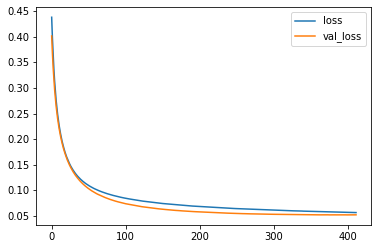

In [29]:
plt.plot(model_loss['loss'], label='loss')
plt.plot(model_loss['val_loss'], label = 'val_loss')
plt.legend()

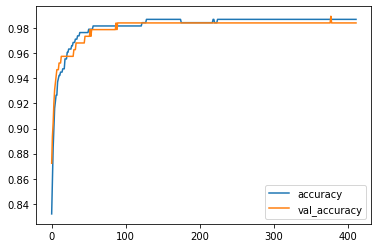

In [30]:
plt.plot(model_loss['accuracy'], label='accuracy')
plt.plot(model_loss['val_accuracy'], label = 'val_accuracy')
plt.legend()

In [31]:
from sklearn.metrics import classification_report, confusion_matrix

In [33]:
predictions = model.predict_classes(X_test)

In [34]:
print(confusion_matrix(y_test, predictions))

[[ 66   1]
 [  2 119]]


In [35]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98        67
           1       0.99      0.98      0.99       121

    accuracy                           0.98       188
   macro avg       0.98      0.98      0.98       188
weighted avg       0.98      0.98      0.98       188

